In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importing my own library
import regika as reg

In [2]:
churn=pd.read_csv('churn_data.csv')
churn.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,8,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,22,Yes,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,10,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,28,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,62,Yes,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [3]:
internet=pd.read_csv('internet_data.csv')
internet

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,Yes,Fiber optic,No,No,No,No,No,No


In [4]:
customer=pd.read_csv('customer_data.csv')
customer

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


### Combining all the three datasets over column customerID

In [5]:
## merging churn and internet
df_initial=pd.merge(churn,internet,how='inner',on='customerID')
df_initial

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No phone service,DSL,Yes,No,No,No,No,No
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Yes,Fiber optic,No,No,No,No,No,No


In [6]:
## Merging df_initial and customer dataframes
telecom=pd.merge(df_initial,customer,how='inner',on='customerID')
telecom

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines,...,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No phone service,...,No,Yes,No,No,No,No,Female,0,Yes,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,No,...,Yes,No,Yes,No,No,No,Male,0,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No,...,Yes,Yes,No,No,No,No,Male,0,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No phone service,...,Yes,No,Yes,Yes,No,No,Male,0,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No,...,No,No,No,No,No,No,Female,0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,Yes,One year,Yes,Mailed check,84.80,1990.5,No,Yes,...,Yes,No,Yes,Yes,Yes,Yes,Male,0,Yes,Yes
7039,2234-XADUH,72,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,Yes,...,No,Yes,Yes,No,Yes,Yes,Female,0,Yes,Yes
7040,4801-JZAZL,11,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,No phone service,...,Yes,No,No,No,No,No,Female,0,Yes,Yes
7041,8361-LTMKD,4,Yes,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,Yes,...,No,No,No,No,No,No,Male,1,Yes,No


In [7]:
## Checking shape
telecom.shape

(7043, 21)

In [8]:
## checking null values
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   MultipleLines     7043 non-null   object 
 10  InternetService   7043 non-null   object 
 11  OnlineSecurity    7043 non-null   object 
 12  OnlineBackup      7043 non-null   object 
 13  DeviceProtection  7043 non-null   object 
 14  TechSupport       7043 non-null   object 
 15  StreamingTV       7043 non-null   object 
 16  StreamingMovies   7043 non-null   object 


In [9]:
telecom['PaymentMethod'].dtype

dtype('O')

In [10]:
## Checking whether values in each object type is valid or not
reg.column_values(telecom)

[8819-IMISP    1
 9586-JGQKH    1
 6368-NWMCE    1
 8740-XLHDR    1
 2068-WWXQZ    1
              ..
 7218-HKQFK    1
 6817-WTYHE    1
 0463-WZZKO    1
 7547-EKNFS    1
 1153-GNOLC    1
 Name: customerID, Length: 7043, dtype: int64,
 Yes    6361
 No      682
 Name: PhoneService, dtype: int64,
 Month-to-month    3875
 Two year          1695
 One year          1473
 Name: Contract, dtype: int64,
 Yes    4171
 No     2872
 Name: PaperlessBilling, dtype: int64,
 Electronic check             2365
 Mailed check                 1612
 Bank transfer (automatic)    1544
 Credit card (automatic)      1522
 Name: PaymentMethod, dtype: int64,
 20.2       11
            11
 19.75       9
 19.9        8
 19.65       8
            ..
 2172.05     1
 5405.8      1
 2724.6      1
 4740        1
 845.25      1
 Name: TotalCharges, Length: 6531, dtype: int64,
 No     5174
 Yes    1869
 Name: Churn, dtype: int64,
 No                  3390
 Yes                 2971
 No phone service     682
 Name: Multiple

In [11]:
## Replacing yes-no type variables to 1 and 0
## making a function
reg.convert_binary(telecom,['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents'])

In [12]:
## Creating dummy variables for columns where a random category will be dropped
dummy1=pd.get_dummies(telecom[['Contract', 'PaymentMethod', 'gender', 'InternetService']],drop_first=True)
telecom.drop(['Contract', 'PaymentMethod', 'gender', 'InternetService'],axis=1,inplace=True)
telecom=pd.concat([telecom,dummy1],axis=1)
telecom

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines,OnlineSecurity,OnlineBackup,...,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,No phone service,No,Yes,...,1,0,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,No,Yes,No,...,0,0,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,No,Yes,Yes,...,0,0,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,No phone service,Yes,No,...,0,0,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,No,No,No,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,24,1,1,84.80,1990.5,0,Yes,Yes,No,...,1,1,1,0,0,0,1,1,0,0
7039,2234-XADUH,72,1,1,103.20,7362.9,0,Yes,No,Yes,...,1,1,1,0,1,0,0,0,1,0
7040,4801-JZAZL,11,0,1,29.60,346.45,0,No phone service,Yes,No,...,1,1,0,0,0,1,0,0,0,0
7041,8361-LTMKD,4,1,1,74.40,306.6,1,Yes,No,No,...,1,0,0,0,0,0,1,1,1,0


In [13]:
# Creating dummy variables for the remaining categorical variables and dropping the level with big names.

# Creating dummy variables for the variable 'MultipleLines'
ml = pd.get_dummies(telecom['MultipleLines'], prefix='MultipleLines')
# Dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'], 1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1], axis=1)

# Creating dummy variables for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'], prefix='OnlineSecurity')
os1 = os.drop(['OnlineSecurity_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,os1], axis=1)

# Creating dummy variables for the variable 'OnlineBackup'.
ob = pd.get_dummies(telecom['OnlineBackup'], prefix='OnlineBackup')
ob1 = ob.drop(['OnlineBackup_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1], axis=1)

# Creating dummy variables for the variable 'DeviceProtection'. 
dp = pd.get_dummies(telecom['DeviceProtection'], prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1], axis=1)

# Creating dummy variables for the variable 'TechSupport'. 
ts = pd.get_dummies(telecom['TechSupport'], prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1], axis=1)

# Creating dummy variables for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'], prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,st1], axis=1)

# Creating dummy variables for the variable 'StreamingMovies'. 
sm = pd.get_dummies(telecom['StreamingMovies'], prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'], 1)
# Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1], axis=1)

In [14]:
telecom.drop(['MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],axis=1,inplace=True)

In [15]:
telecom.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [16]:
# Converting Total Charges datatype to float64
## telecom['TotalCharges']=telecom['TotalCharges'].astype(float)
# this will give error as  there are 11 values that are empty(' ')
telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'],errors='coerce')
# same error


In [17]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7032 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [18]:
# Checking outliers in continuous variables
num_vars=telecom[['tenure','MonthlyCharges','TotalCharges']]
num_vars.describe(percentiles=[.25,.50,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
90%,69.000000,102.600000,5976.640000
95%,72.000000,107.400000,6923.590000
99%,72.000000,114.729000,8039.883000


No exceptional increases found. Dataframe may be free of any outliers.

In [19]:
telecom.isnull().sum()

customerID                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No                          0
MultipleLines_Yes                         0
OnlineSecurity_No                         0
OnlineSecurity_Yes                        0
OnlineBackup_No                 

Since total charges missing values are too low we can get rid of them

In [20]:
telecom=telecom[~telecom['TotalCharges'].isnull()]

In [21]:
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
InternetService_Fiber optic              0
InternetService_No                       0
MultipleLines_No                         0
MultipleLines_Yes                        0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

No missing values now

In [22]:
# Checking churnrate
churn= sum(telecom['Churn'])/len(telecom['Churn'].index)
churn

0.26578498293515357

It's around 27%. Fortunately, in this case, we have about 27% churn rate. This is neither exactly 'balanced' (which a 50-50 ratio would be called) nor heavily imbalanced. So we'll not have to do any special treatment for this dataset.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
y=telecom.pop('Churn')


In [25]:
X=telecom.drop(['customerID'],axis=1)

In [26]:
# splitting into train and test

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [27]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])

<ipython-input-28-26f975bb0834>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['tenure','MonthlyCharges','TotalCharges']]=scaler.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
C:\Users\Yuthika\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


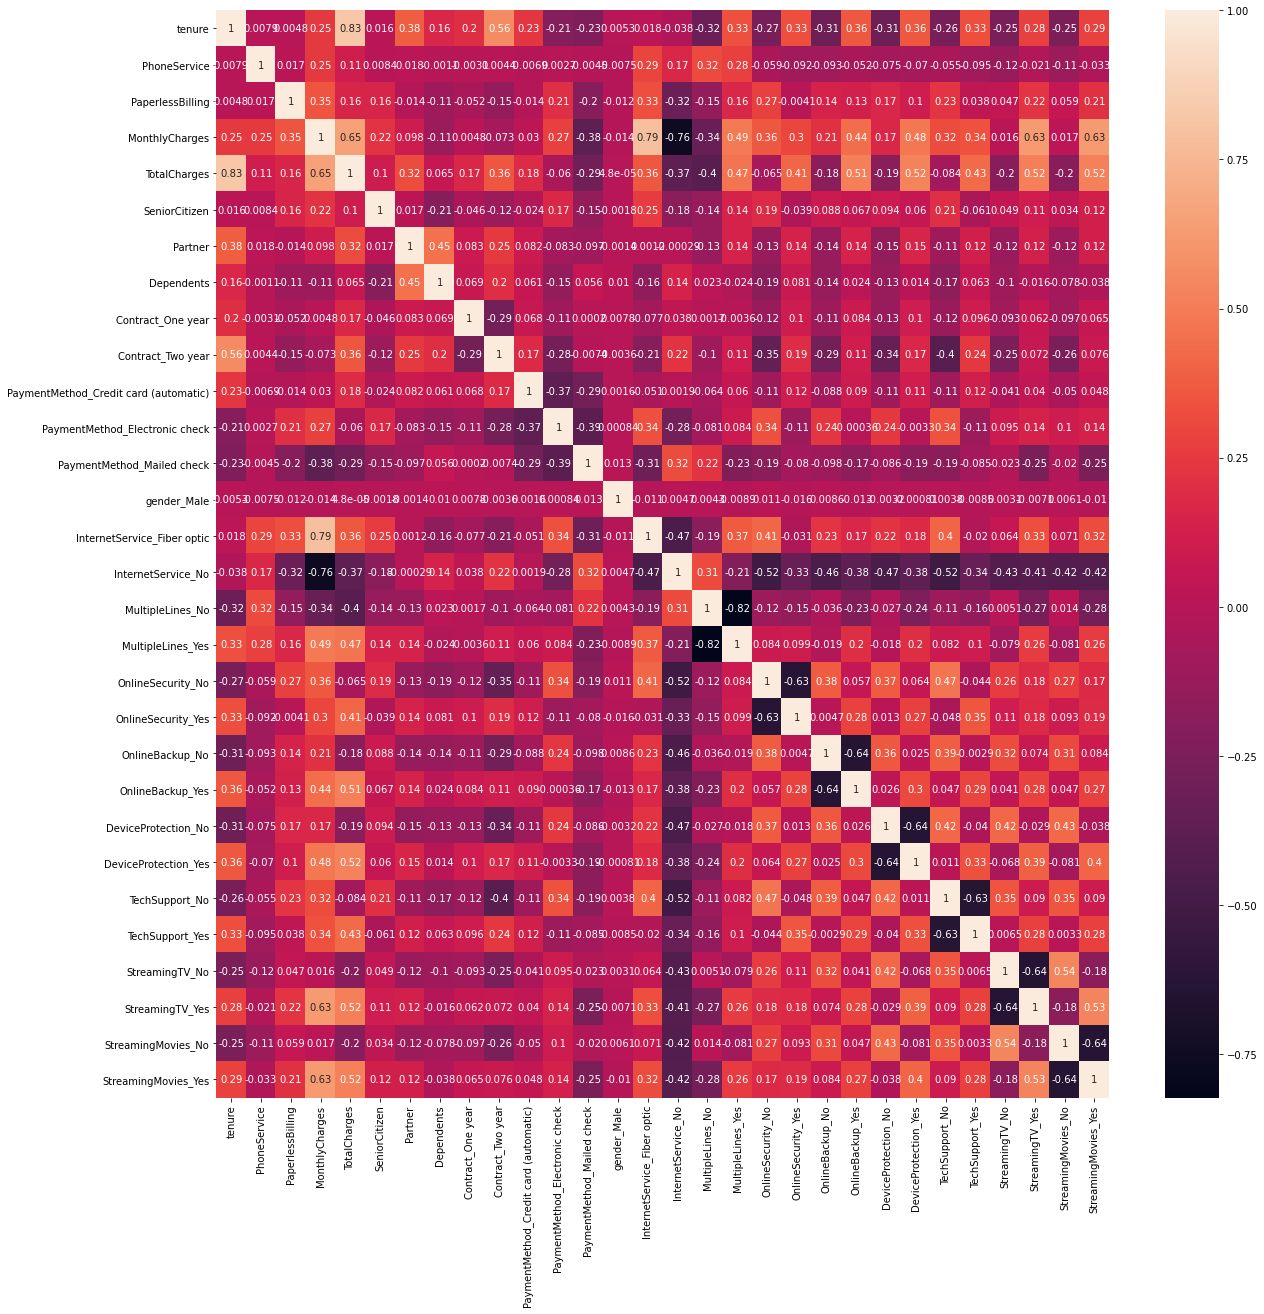

In [29]:
# Visualising categories
plt.figure(figsize=(20,20))
sns.heatmap(telecom.corr(),annot=True)
plt.show()

1. Tenure and Monthly charges are highly positively corr
2. MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, techSupport,StreamingTV, Streaming Movies are negatively correlated with InternetServices_NO
3. Yes and No of MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, techSupport,StreamingTV, Streaming Movies are extremely highly correlated. We need to remove atleast one of them.
4. MOnthlyCharges are negatively corr with no Internet which means having internet costs more.

In [30]:
# Working on point 3 of inferences
X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1,inplace=True)
X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No',
                       'StreamingTV_No','StreamingMovies_No'],axis=1,inplace=True)

C:\Users\Yuthika\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


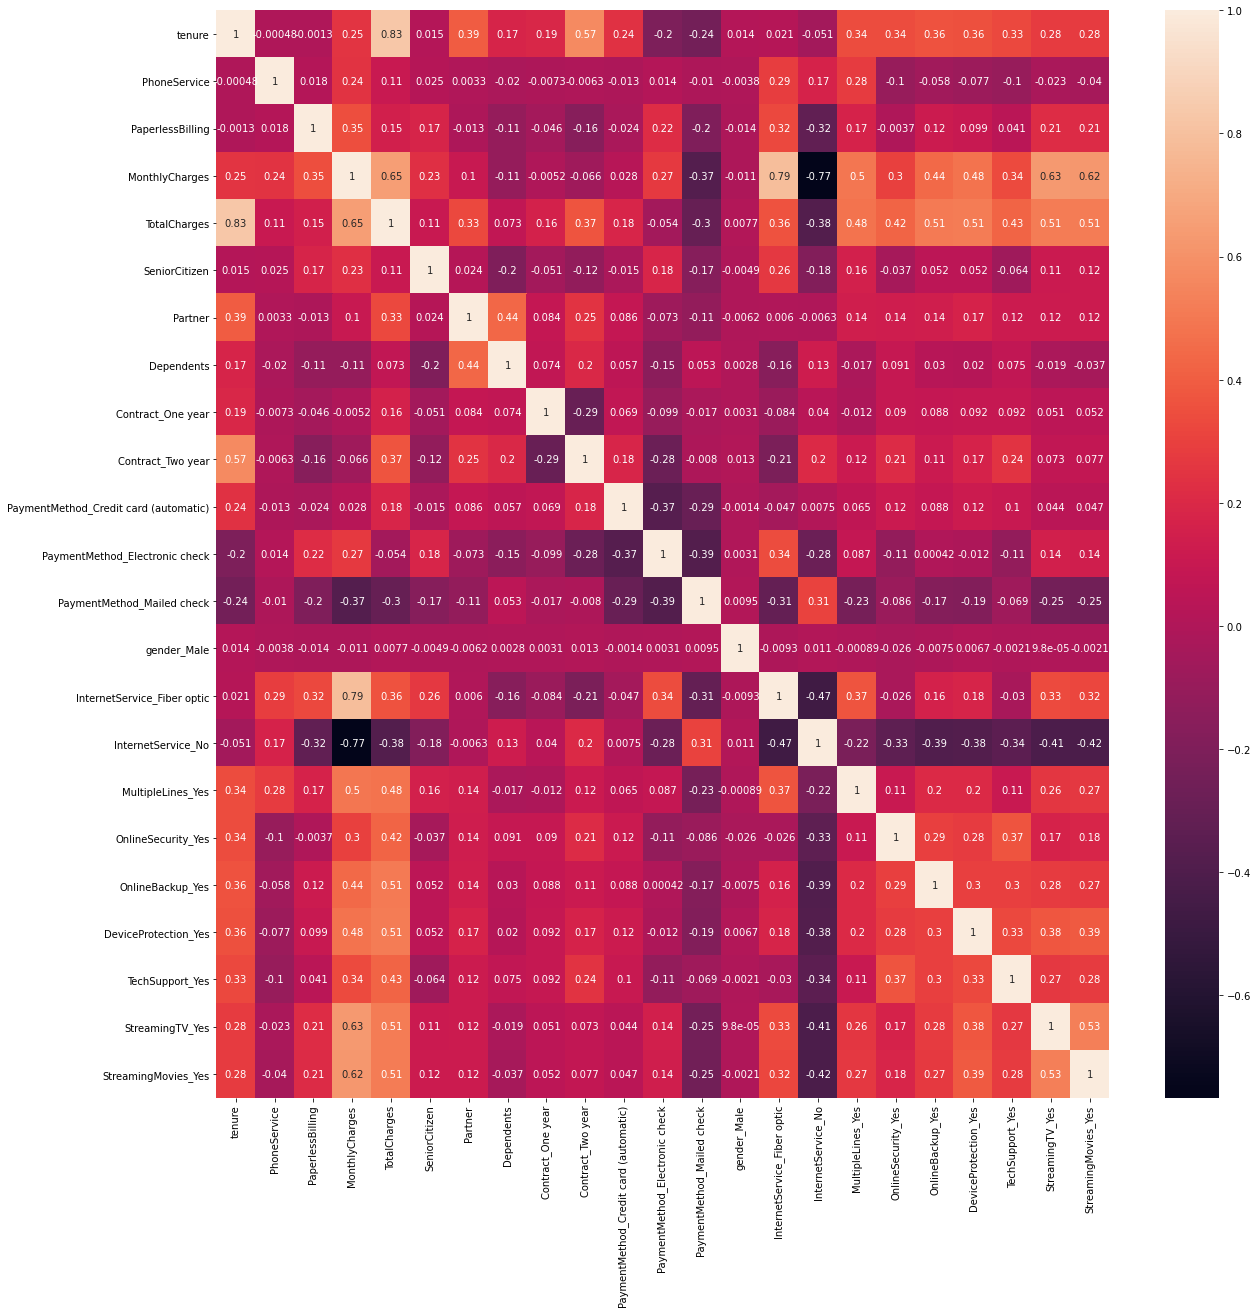

In [31]:
# Visualising categories again
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

### Building the model

In [32]:
import statsmodels.api as sm

In [33]:
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Thu, 18 Mar 2021   Deviance:                       4009.4
Time:                        19:02:06   Pearson chi2:                 6.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.9382      1.546     -2.547      0.011      -6.969      -0.908
tenure                                   -1.5172      0.189     -8.015      0.000      -1.888      -1.146
PhoneService                              0.9507      0.789      1.205      0.228      -0.595       2.497
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
MonthlyCharges                           -2.1806      1.160     -1.880      0.060      -4.454       0.092
TotalCharges                              0.7332      0.198      3.705      0.000       0.345       1.121
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -2.7792      0.982     -2.831      0.005      -4.703      -0.855
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_Yes                       0.8484      0.396      2.143      0.032       0.072       1.624
=========================================================================================================
"""

## Using RFE 

In [34]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [35]:
from sklearn.feature_selection import RFE
rfe=RFE(logreg,15)
rfe=rfe.fit(X_train,y_train)

C:\Users\Yuthika\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [36]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('tenure', True, 1),
 ('PhoneService', False, 3),
 ('PaperlessBilling', True, 1),
 ('MonthlyCharges', True, 1),
 ('TotalCharges', True, 1),
 ('SeniorCitizen', True, 1),
 ('Partner', False, 7),
 ('Dependents', False, 6),
 ('Contract_One year', True, 1),
 ('Contract_Two year', True, 1),
 ('PaymentMethod_Credit card (automatic)', True, 1),
 ('PaymentMethod_Electronic check', False, 4),
 ('PaymentMethod_Mailed check', True, 1),
 ('gender_Male', False, 8),
 ('InternetService_Fiber optic', True, 1),
 ('InternetService_No', True, 1),
 ('MultipleLines_Yes', True, 1),
 ('OnlineSecurity_Yes', False, 2),
 ('OnlineBackup_Yes', False, 5),
 ('DeviceProtection_Yes', False, 9),
 ('TechSupport_Yes', True, 1),
 ('StreamingTV_Yes', True, 1),
 ('StreamingMovies_Yes', True, 1)]

In [37]:
col=X_train.columns[rfe.support_]

In [38]:
X_train=X_train[col]
X_test=X_test[col]

In [39]:
# Checking stats of RFE model
X_train_sm=sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2011.1
Date:                Thu, 18 Mar 2021   Deviance:                       4022.2
Time:                        19:02:08   Pearson chi2:                 6.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.2462      0.189    -11.879      0.000      -2.617      -1.876
tenure                                   -1.5596      0.187     -8.334      0.000      -1.926      -1.193
PaperlessBilling                          0.3436      0.090      3.832      0.000       0.168       0.519
MonthlyCharges                           -0.9692      0.199     -4.878      0.000      -1.359      -0.580
TotalCharges                              0.7421      0.197      3.764      0.000       0.356       1.128
SeniorCitizen                             0.4296      0.100      4.312      0.000       0.234       0.625
Contract_One year                        -0.6830      0.128     -5.342      0.000      -0.934      -0.432
Contract_Two year                        -1.2931      0.211     -6.138      0.000      -1.706      -0.880
PaymentMethod_Credit card (automatic)    -0.3724      0.113     -3.308      0.001      -0.593      -0.152
PaymentMethod_Mailed check               -0.3723      0.111     -3.345      0.001      -0.591      -0.154
InternetService_Fiber optic               1.5865      0.216      7.342      0.000       1.163       2.010
InternetService_No                       -1.6897      0.216     -7.830      0.000      -2.113      -1.267
MultipleLines_Yes                         0.3779      0.104      3.640      0.000       0.174       0.581
TechSupport_Yes                          -0.2408      0.109     -2.210      0.027      -0.454      -0.027
StreamingTV_Yes                           0.5796      0.114      5.102      0.000       0.357       0.802
StreamingMovies_Yes                       0.4665      0.111      4.197      0.000       0.249       0.684
=========================================================================================================
"""

all p values are good

In [40]:
y_train_predict=res.predict(X_train_sm)

In [41]:
y_train_pred_final=pd.DataFrame({'Churn':y_train.values,'Churn_Prob':y_train_predict})
y_train_pred_final['custID']=y_train.index
y_train_pred_final

,Churn,Churn_Prob,custID
879,0,0.192642,879
5790,0,0.275624,5790
6498,1,0.599507,6498
880,1,0.513571,880
2784,1,0.648233,2784
...,...,...,...
79,0,0.015336,79
3934,0,0.126458,3934
5964,0,0.039247,5964
6947,0,0.129142,6947


In [42]:
# Creating new column if churn_prob>0.5 then 1 otherwise 0
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Churn,Churn_Prob,custID,predicted
879,0,0.192642,879,0
5790,0,0.275624,5790,0
6498,1,0.599507,6498,1
880,1,0.513571,880,1
2784,1,0.648233,2784,1
...,...,...,...,...
79,0,0.015336,79,0
3934,0,0.126458,3934,0
5964,0,0.039247,5964,0
6947,0,0.129142,6947,0


In [43]:
y_train_pred_final[y_train_pred_final['Churn']!=y_train_pred_final['predicted']]

,Churn,Churn_Prob,custID,predicted
1037,0,0.502428,1037,1
2548,0,0.638818,2548,1
6746,1,0.190130,6746,0
4812,1,0.201665,4812,0
4128,1,0.107348,4128,0
...,...,...,...,...
5001,1,0.148471,5001,0
2965,1,0.156839,2965,0
1904,1,0.225202,1904,0
3305,0,0.580643,3305,1


Out of 4922 rows, 934 were wrongly predicted

In [44]:
from sklearn import metrics

In [45]:
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3275,  360],
       [ 574,  713]], dtype=int64)

In [46]:
# Predicted     not_churn    churn
# Actual
# not_churn        3275      360
# churn            574       713  

In [47]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8102397399431126

accuracy of about 80.8% which seems to be a good number to begin with.

In [48]:
# Calculating VIF
reg.vif(X_train_sm)

,Features,vif
3,MonthlyCharges,26.77
0,const,21.53
4,TotalCharges,10.42
1,tenure,7.48
10,InternetService_Fiber optic,7.13
11,InternetService_No,4.77
7,Contract_Two year,2.61
14,StreamingTV_Yes,2.20
15,StreamingMovies_Yes,2.17
12,MultipleLines_Yes,1.75


In [49]:
# Removing MonthlyCharges which has a very high VIF
X_train_sm.drop('MonthlyCharges',axis=1,inplace=True)

In [50]:
# Model 2
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4907
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2023.1
Date:                Thu, 18 Mar 2021   Deviance:                       4046.2
Time:                        19:02:08   Pearson chi2:                 5.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5971      0.130    -12.296      0.000      -1.852      -1.343
tenure                                   -1.3286      0.180     -7.401      0.000      -1.681      -0.977
PaperlessBilling                          0.3533      0.089      3.958      0.000       0.178       0.528
TotalCharges                              0.4347      0.186      2.340      0.019       0.071       0.799
SeniorCitizen                             0.4569      0.099      4.601      0.000       0.262       0.652
Contract_One year                        -0.7289      0.127     -5.729      0.000      -0.978      -0.480
Contract_Two year                        -1.3277      0.210     -6.322      0.000      -1.739      -0.916
PaymentMethod_Credit card (automatic)    -0.3870      0.112     -3.442      0.001      -0.607      -0.167
PaymentMethod_Mailed check               -0.3618      0.110     -3.274      0.001      -0.578      -0.145
InternetService_Fiber optic               0.6888      0.109      6.297      0.000       0.474       0.903
InternetService_No                       -0.9555      0.156     -6.120      0.000      -1.262      -0.649
MultipleLines_Yes                         0.1700      0.094      1.814      0.070      -0.014       0.354
TechSupport_Yes                          -0.4371      0.101     -4.307      0.000      -0.636      -0.238
StreamingTV_Yes                           0.2881      0.096      2.996      0.003       0.100       0.477
StreamingMovies_Yes                       0.1944      0.096      2.031      0.042       0.007       0.382
=========================================================================================================
"""

In [51]:
# Calculating VIF for model 2
reg.vif(X_train_sm)

,Features,vif
0,const,11.94
3,TotalCharges,8.77
1,tenure,6.95
6,Contract_Two year,2.59
9,InternetService_Fiber optic,2.11
10,InternetService_No,2.07
13,StreamingTV_Yes,1.68
14,StreamingMovies_Yes,1.68
5,Contract_One year,1.59
12,TechSupport_Yes,1.53


In [52]:
y_train_predict=res.predict(X_train_sm)

In [53]:
y_train_pred_final['Churn_Prob']=y_train_predict

In [54]:
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Churn,Churn_Prob,custID,predicted
879,0,0.227902,879,0
5790,0,0.228644,5790,0
6498,1,0.674892,6498,1
880,1,0.615868,880,1
2784,1,0.662260,2784,1
...,...,...,...,...
79,0,0.017493,79,0
3934,0,0.094122,3934,0
5964,0,0.057996,5964,0
6947,0,0.110657,6947,0


In [55]:
# checking changes in confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3269,  366],
       [ 590,  697]], dtype=int64)

In [56]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8057700121901666

no changes in accuracy

Total Charges should be removed

In [57]:
# Removing TotalCharges as it has high vif
X_train_sm.drop('TotalCharges',axis=1,inplace=True)

In [58]:
# MOdel 3
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4908
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.9
Date:                Thu, 18 Mar 2021   Deviance:                       4051.9
Time:                        19:02:09   Pearson chi2:                 5.25e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.6577      0.127    -13.094      0.000      -1.906      -1.410
tenure                                   -0.9426      0.065    -14.480      0.000      -1.070      -0.815
PaperlessBilling                          0.3455      0.089      3.877      0.000       0.171       0.520
SeniorCitizen                             0.4597      0.100      4.613      0.000       0.264       0.655
Contract_One year                        -0.7218      0.127     -5.702      0.000      -0.970      -0.474
Contract_Two year                        -1.2987      0.208     -6.237      0.000      -1.707      -0.891
PaymentMethod_Credit card (automatic)    -0.3874      0.113     -3.442      0.001      -0.608      -0.167
PaymentMethod_Mailed check               -0.3307      0.110     -3.020      0.003      -0.545      -0.116
InternetService_Fiber optic               0.8052      0.097      8.272      0.000       0.614       0.996
InternetService_No                       -0.9726      0.155     -6.261      0.000      -1.277      -0.668
MultipleLines_Yes                         0.2097      0.092      2.279      0.023       0.029       0.390
TechSupport_Yes                          -0.4046      0.101     -4.019      0.000      -0.602      -0.207
StreamingTV_Yes                           0.3390      0.094      3.619      0.000       0.155       0.523
StreamingMovies_Yes                       0.2428      0.093      2.598      0.009       0.060       0.426
=========================================================================================================
"""

In [59]:
reg.vif(X_train_sm)

,Features,vif
0,const,10.16
5,Contract_Two year,2.59
1,tenure,2.45
9,InternetService_No,1.93
8,InternetService_Fiber optic,1.71
4,Contract_One year,1.59
13,StreamingMovies_Yes,1.59
12,StreamingTV_Yes,1.58
11,TechSupport_Yes,1.45
7,PaymentMethod_Mailed check,1.37


Now all the VIF's look good. We should not drop any variables now.

Let's predict y and add that to our dataframe.

In [60]:
y_train_predict=res.predict(X_train_sm)

In [61]:
y_train_pred_final['Churn_Prob']=y_train_predict
y_train_pred_final['predicted']=y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.5 else 0)
y_train_pred_final

,Churn,Churn_Prob,custID,predicted
879,0,0.245817,879,0
5790,0,0.265361,5790,0
6498,1,0.669410,6498,1
880,1,0.630970,880,1
2784,1,0.682916,2784,1
...,...,...,...,...
79,0,0.024976,79,0
3934,0,0.095470,3934,0
5964,0,0.063184,5964,0
6947,0,0.100672,6947,0


let's now check the confusion matrix

In [62]:
# checking changes in confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Churn,y_train_pred_final.predicted)
confusion

array([[3278,  357],
       [ 597,  690]], dtype=int64)

In [63]:
metrics.accuracy_score(y_train_pred_final.Churn,y_train_pred_final.predicted)

0.8061763510767981

not much changs in accuracy

In [64]:
# Tagging Confusion matrix
TP=confusion[1,1]
FP=confusion[0,1]
TN=confusion[0,0]
FN=confusion[1,0]

In [65]:
params=reg.log_model_params(y_actual=y_train_pred_final.Churn,y_predicted=y_train_pred_final.predicted)

In [66]:
y_train_pred_final.to_csv('Churn_Predicted.csv')

In [67]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

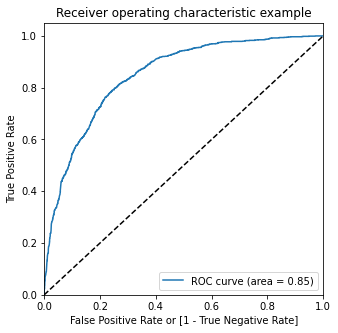

In [68]:
draw_roc(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

In [69]:
# Evaluating best fit cut off
numbers=[float(i/10) for i in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Churn_Prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Churn,Churn_Prob,custID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
879,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0
5790,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0
6498,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0
880,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0
2784,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0


In [70]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

for i in numbers:
    params=reg.log_model_params(y_train_pred_final.Churn,y_train_pred_final[i])
    cutoff_df.loc[i] =[ i ,params['accuracy'],params['sensitivity'],params['specificity/recall']]
print(cutoff_df)

     prob   accuracy       sensi       speci
0.0   0.0  26.147907  100.000000    0.000000
0.1   0.1  61.499390   94.327894   49.876204
0.2   0.2  72.186103   84.615385   67.785420
0.3   0.3  77.001219   77.622378   76.781293
0.4   0.4  79.053230   63.636364   84.511692
0.5   0.5  80.617635   53.613054   90.178817
0.6   0.6  79.804957   38.073038   94.580468
0.7   0.7  77.631044   19.658120   98.156809
0.8   0.8  74.786672    4.118104   99.807428
0.9   0.9  73.852093    0.000000  100.000000


C:\Users\Yuthika\OneDrive\Desktop\UPGRAD- PGDDS\Machine Learning\Multivariate Logistic Regression\Telecom_dataset\regika.py:40: RuntimeWarning: invalid value encountered in true_divide
  Negative_pred_value=TN/float(TN+FN)
C:\Users\Yuthika\OneDrive\Desktop\UPGRAD- PGDDS\Machine Learning\Multivariate Logistic Regression\Telecom_dataset\regika.py:39: RuntimeWarning: invalid value encountered in true_divide
  Positive_pred_value=TP/float(TP+FP)
C:\Users\Yuthika\OneDrive\Desktop\UPGRAD- PGDDS\Machine Learning\Multivariate Logistic Regression\Telecom_dataset\regika.py:41: RuntimeWarning: invalid value encountered in true_divide
  precision=TP/float(TP+FP)


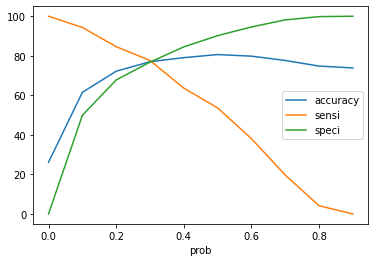

In [71]:
cutoff_df.plot.line(x='prob',y=['accuracy','sensi','speci'])
plt.show()

0.3 seems to be the optimum point to take cut off

In [72]:
y_train_pred_final['finalpredicted']=y_train_pred_final['Churn_Prob'].map(lambda x:1 if x>0.3 else 0)
y_train_pred_final

,Churn,Churn_Prob,custID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,finalpredicted
879,0,0.245817,879,0,1,1,1,0,0,0,0,0,0,0,0
5790,0,0.265361,5790,0,1,1,1,0,0,0,0,0,0,0,0
6498,1,0.669410,6498,1,1,1,1,1,1,1,1,0,0,0,1
880,1,0.630970,880,1,1,1,1,1,1,1,1,0,0,0,1
2784,1,0.682916,2784,1,1,1,1,1,1,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,0.024976,79,0,1,0,0,0,0,0,0,0,0,0,0
3934,0,0.095470,3934,0,1,0,0,0,0,0,0,0,0,0,0
5964,0,0.063184,5964,0,1,0,0,0,0,0,0,0,0,0,0
6947,0,0.100672,6947,0,1,1,0,0,0,0,0,0,0,0,0


In [73]:
reg.log_model_params(y_train_pred_final.Churn,y_train_pred_final.finalpredicted)

{'accuracy': 77.00121901665989,
 'TN': 2791,
 'FP': 844,
 'FN': 288,
 'TP': 999,
 'sensitivity': 77.62237762237763,
 'specificity/recall': 76.78129298486934,
 'precision': 0.5420510037981552,
 'False_Positive_Rate': 23.21870701513066,
 'Positve_Prediction_value': 0.5420510037981552,
 'Negative_Prediction_value': 0.9064631373822669}

In [74]:
from sklearn.metrics import precision_score, recall_score

In [75]:
precision_score(y_train_pred_final.Churn,y_train_pred_final.finalpredicted)

0.5420510037981552

In [76]:
recall_score(y_train_pred_final.Churn,y_train_pred_final.finalpredicted)

0.7762237762237763

In [77]:
from sklearn.metrics import precision_recall_curve

In [78]:
p,r,thresholds=precision_recall_curve(y_train_pred_final.Churn,y_train_pred_final.Churn_Prob)

In [79]:
p

array([0.26706786, 0.26702658, 0.26708204, ..., 1.        , 1.        ,
       1.        ])

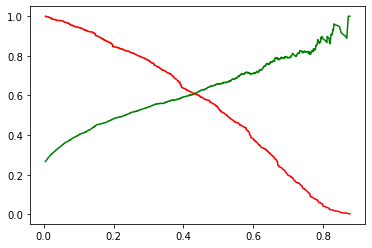

In [80]:
plt.plot(thresholds,p[:-1],'g')
plt.plot(thresholds,r[:-1],'r')

### Evaluating the test data

In [82]:
X_test[['tenure','MonthlyCharges','TotalCharges']]=scaler.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test.drop(['MonthlyCharges','TotalCharges'],axis=1,inplace=True)

In [83]:
X_test_sm=sm.add_constant(X_test)

In [84]:
y_test_predict=res.predict(X_test_sm)

In [95]:
## Using 0.42 cut-off according to precision-recall curve as for an imbalanced dataset, precision-recall is a better judge than ROC
y_test_pred_final=pd.DataFrame({'Churn':y_test.values,'Churn_Prob':y_test_predict})
y_test_pred_final['custID']=y_test.index
y_test_pred_final['predicted']=y_test_pred_final['Churn_Prob'].map(lambda x:1 if x>0.42 else 0)
y_test_pred_final

,Churn,Churn_Prob,custID,predicted
942,0,0.419725,942,0
3730,1,0.260232,3730,0
1761,0,0.008650,1761,0
2283,1,0.592626,2283,1
1872,0,0.013989,1872,0
...,...,...,...,...
1289,0,0.023041,1289,0
3508,0,0.054121,3508,0
6765,0,0.008348,6765,0
3598,0,0.503619,3598,1


In [96]:
reg.log_model_params(y_test_pred_final.Churn,y_test_pred_final.predicted)

{'accuracy': 78.38862559241706,
 'TN': 1286,
 'FP': 242,
 'FN': 214,
 'TP': 368,
 'sensitivity': 63.230240549828174,
 'specificity/recall': 84.16230366492147,
 'precision': 0.6032786885245902,
 'False_Positive_Rate': 15.837696335078533,
 'Positve_Prediction_value': 0.6032786885245902,
 'Negative_Prediction_value': 0.8573333333333333}